In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats


In [2]:
# Load dataset (Update the file path if needed)

df = pd.read_csv("crop_production.csv")

# Display first 5 rows
display(df.head())

# Show dataset information
display(df.info())

# Check for missing values
print("Missing Values:\n", df.isnull().sum())


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


None

Missing Values:
 State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [3]:
# Select only numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Display first 5 rows of numeric data
display(df_numeric.head())


,Crop_Year,Area,Production
0,2000,1254.0,2000.0
1,2000,2.0,1.0
2,2000,102.0,321.0
3,2000,176.0,641.0
4,2000,720.0,165.0


In [4]:
df_numeric = df_numeric.copy()  # Make an independent copy to avoid warning

df_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
df_numeric.dropna(inplace=True)


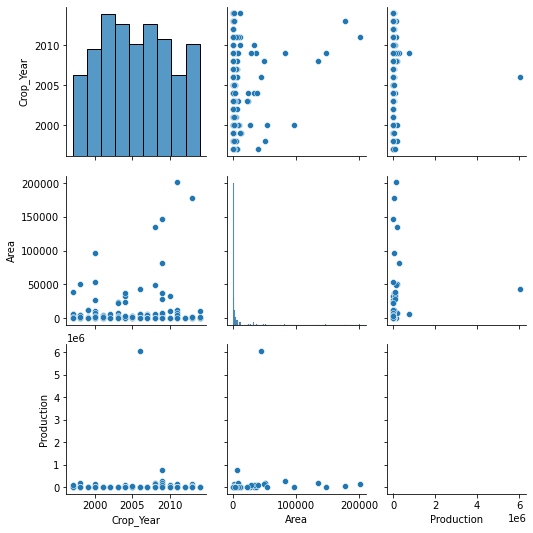

In [5]:
sns.pairplot(df_numeric.sample(200))  # Limit to 500 rows for speed
plt.show()

In [5]:
#sns.pairplot(df_numeric)
#plt.show()

In [8]:
X = df_numeric.drop(columns=['Production'])  # Features
y = df_numeric['Production'] 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 401500837552061.44


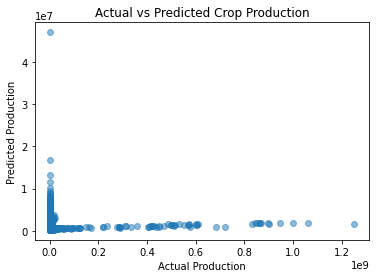

In [13]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title("Actual vs Predicted Crop Production")
plt.show()

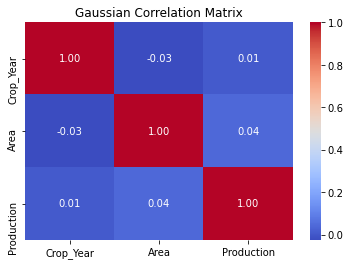

In [14]:
gaussian_matrix = df_numeric.corr()
sns.heatmap(gaussian_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Gaussian Correlation Matrix")
plt.show()


In [15]:
future_data = np.array([[2025, 50000]])  # Example future input (Year, Area)
future_prediction = model.predict(future_data)
print(f"Predicted Crop Production for 2025 and 50,000 Area: {future_prediction[0]}")

Predicted Crop Production for 2025 and 50,000 Area: 1502554.9732055664
